In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# 범주형 특성들 처리방법
- 더미 변수를 이용해서 처리

In [3]:
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'), header = None, index_col=False, 
                  names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status',
                          'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
                          'hours-per-week', 'native-country', 'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [6]:
print('원본 특성 : \n', list(data.columns))
data_dummies = pd.get_dummies(data)
print('더미 특성 : \n', list(data_dummies.columns))

원본 특성 : 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']
더미 특성 : 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-serv

In [7]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
features = data_dummies.loc[:, 'age': 'occupation_ Transport-moving']
X = features.values
y= data_dummies['income_ >50K'].values
X.shape, y.shape

((32561, 44), (32561,))

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression().fit(X_train, y_train)

print('test score : {:.4f}'.format(logreg.score(X_test, y_test)))

test score : 0.8087


# 숫자로 표현된 범주형 특성
- str로 바꿔주면 된다.

In [17]:
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1], '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,범주형 특성,숫자 특성
0,양말,0
1,여우,1
2,양말,2
3,상자,1


In [18]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [22]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


# 구간 분할, 이산화, 선형모델, 트리모델
- 

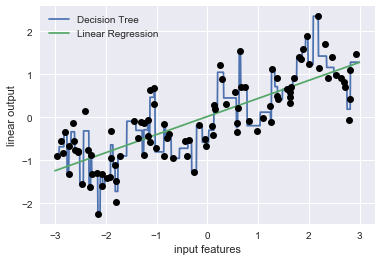

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = 'Decision Tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label = 'Linear Regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('linear output')
plt.xlabel('input features')
plt.legend(loc='best')

## 구간 분할/이산화 (bining)
- 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 구간 분할(bining)/이산화이다.

In [25]:
bins = np.linspace(-3, 3, 11)
print('구간 : {}'.format(bins))

구간 : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [26]:
which_bin = np.digitize(X, bins=bins)
print('\n데이터 포인트 \n', X[:5])
print('\n데이터 포인트의 소속 구간:\n', which_bin[:5])


데이터 포인트 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]
